# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 33.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 82.1 MB/s eta 0:00:01


**Important: Restart the Kernel at this moment**

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Define transforms
transform = transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
train_ds = datasets.MNIST(root='./data', download=True, train=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_ds = datasets.MNIST(root='./data', download=True, train=False, transform=transform)
test_loader = DataLoader(test_ds, batch_size=1000, shuffle=False)


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


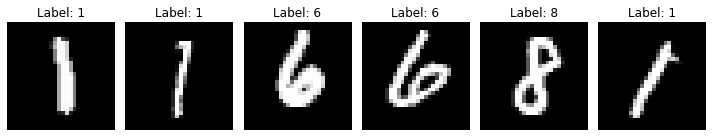

In [3]:
#Display data
dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.figure(figsize=(10, 4))
for i in range(6):
    img = images[i].squeeze()  
    label = labels[i].item()
    
    plt.subplot(1, 6, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I used transforms.ToTensor() because MNIST images come in PIL format, but PyTorch models need tensors as input. This transform converts the images to tensors and scales the pixel values from 0–255 down to 0–1, which helps the model learn better.
I didn’t add normalization or data augmentation since MNIST is already clean and simple, so converting to tensors is usually enough. For more complex datasets, though, adding normalization or augmentation can help the model generalize better.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Shape of image batch: torch.Size([64, 1, 28, 28])
Shape of label batch: torch.Size([64])
Shape of a single image: torch.Size([1, 28, 28])
Data type of image tensor: torch.float32
Data type of label tensor: torch.int64
4


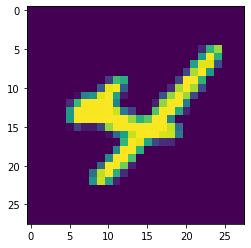

3


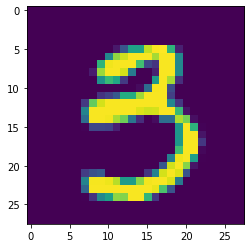

1


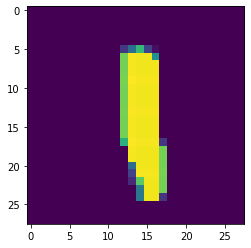

8


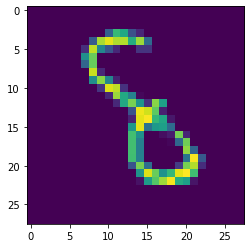

0


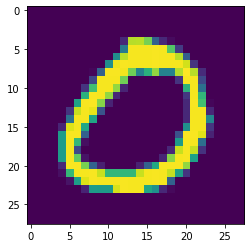

In [5]:
# Explore data
## YOUR CODE HERE ##
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("Shape of image batch:", images.shape)  
print("Shape of label batch:", labels.shape)

print("Shape of a single image:", images[0].shape)

print("Data type of image tensor:", images.dtype)
print("Data type of label tensor:", labels.dtype)

show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
## YOUR CODE HERE ##
import torch.nn as nn
import torch.nn.functional as F

class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.flatten = nn.Flatten()             
        self.fc1 = nn.Linear(28*28, 256)           
        self.fc2 = nn.Linear(256, 128)             
        self.fc3 = nn.Linear(128, 10)            

    def forward(self, x):
        x = self.flatten(x)                     
        x = F.relu(self.fc1(x))                 
        x = F.relu(self.fc2(x))     
        x = self.fc3(x)                         
        return x

model = MNISTNet()
print(model)


MNISTNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MNISTNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)

MNISTNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = MNISTNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0.0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        if (batch_idx + 1) % 250 == 0:
            avg_loss = total_train_loss / (batch_idx + 1)
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}], Loss: {avg_loss:.4f}")

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    #Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    accuracy = correct / total
    val_losses.append(avg_val_loss)
    val_accuracies.append(accuracy)

    print(f"\n📊 Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, Val Acc = {accuracy:.2%}\n")


Using device: cuda
Epoch [1/10], Batch [250], Loss: 0.5363
Epoch [1/10], Batch [500], Loss: 0.3840
Epoch [1/10], Batch [750], Loss: 0.3135

📊 Epoch 1: Train Loss = 0.2819, Val Loss = 0.1550, Val Acc = 95.28%

Epoch [2/10], Batch [250], Loss: 0.1188
Epoch [2/10], Batch [500], Loss: 0.1160
Epoch [2/10], Batch [750], Loss: 0.1100

📊 Epoch 2: Train Loss = 0.1080, Val Loss = 0.0888, Val Acc = 97.26%

Epoch [3/10], Batch [250], Loss: 0.0738
Epoch [3/10], Batch [500], Loss: 0.0714
Epoch [3/10], Batch [750], Loss: 0.0731

📊 Epoch 3: Train Loss = 0.0715, Val Loss = 0.0721, Val Acc = 97.70%

Epoch [4/10], Batch [250], Loss: 0.0469
Epoch [4/10], Batch [500], Loss: 0.0504
Epoch [4/10], Batch [750], Loss: 0.0505

📊 Epoch 4: Train Loss = 0.0509, Val Loss = 0.0639, Val Acc = 97.98%

Epoch [5/10], Batch [250], Loss: 0.0356
Epoch [5/10], Batch [500], Loss: 0.0347
Epoch [5/10], Batch [750], Loss: 0.0364

📊 Epoch 5: Train Loss = 0.0377, Val Loss = 0.0781, Val Acc = 97.75%

Epoch [6/10], Batch [250], Loss

Plot the training loss (and validation loss/accuracy, if recorded).

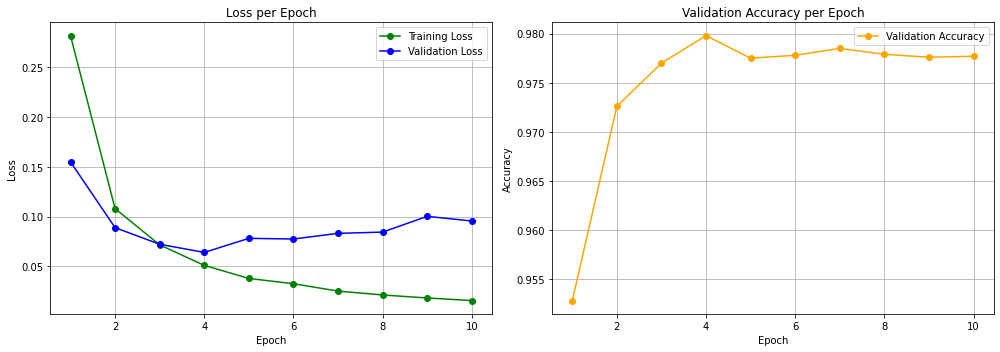

In [9]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 5))

#Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'g-o', label='Training Loss')
plt.plot(epochs, val_losses, 'b-o', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, 'orange', marker='o', label='Validation Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
## YOUR CODE HERE ##
model.eval()  
correct = 0
total = 0

with torch.no_grad():  
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Test Accuracy: 97.77%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [11]:
## YOUR CODE HERE ##
class ImprovedMNISTNet(nn.Module):
    def __init__(self):
        super(ImprovedMNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    accuracy = correct / total

    val_losses.append(avg_val_loss)
    val_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, Val Acc = {accuracy:.2%}")


Epoch 1: Train Loss = 0.0112, Val Loss = 0.1139, Val Acc = 98.02%
Epoch 2: Train Loss = 0.0087, Val Loss = 0.1008, Val Acc = 98.10%
Epoch 3: Train Loss = 0.0086, Val Loss = 0.1190, Val Acc = 97.79%
Epoch 4: Train Loss = 0.0087, Val Loss = 0.1112, Val Acc = 97.96%
Epoch 5: Train Loss = 0.0099, Val Loss = 0.0962, Val Acc = 98.11%
Epoch 6: Train Loss = 0.0069, Val Loss = 0.1036, Val Acc = 98.26%
Epoch 7: Train Loss = 0.0078, Val Loss = 0.1284, Val Acc = 97.93%
Epoch 8: Train Loss = 0.0068, Val Loss = 0.1332, Val Acc = 98.05%
Epoch 9: Train Loss = 0.0063, Val Loss = 0.1067, Val Acc = 98.25%
Epoch 10: Train Loss = 0.0071, Val Loss = 0.1190, Val Acc = 98.06%


In [15]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.2%}")


Test Accuracy: 98.06%


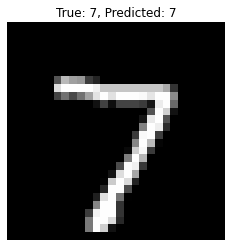

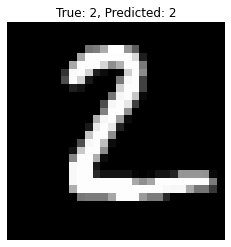

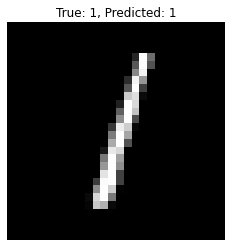

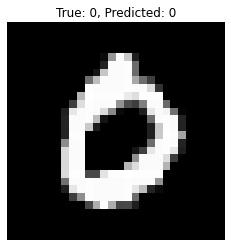

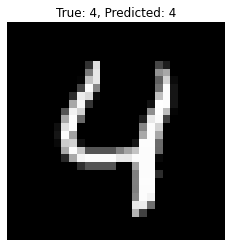

In [17]:
#predicted
import matplotlib.pyplot as plt

dataiter = iter(test_loader)
images, labels = next(dataiter)

images = images[:5].to(device)
labels = labels[:5].to(device)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

for i in range(5):
    img = images[i].cpu().squeeze()  
    true_label = labels[i].item()
    predicted_label = preds[i].item()
    
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


## Saving your model
Using `torch.save`, save your model for future loading.

In [18]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), 'mnist_model.pth')